In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Exploration: 

In [2]:
# load the data 
data = pd.read_csv('/DataScienceNotes/Assignments/08-Logistic Regression/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###### All the columns are numeric and not having null values

In [4]:
# finding the min , max, standard deviation and mean.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1200x1000 with 0 Axes>

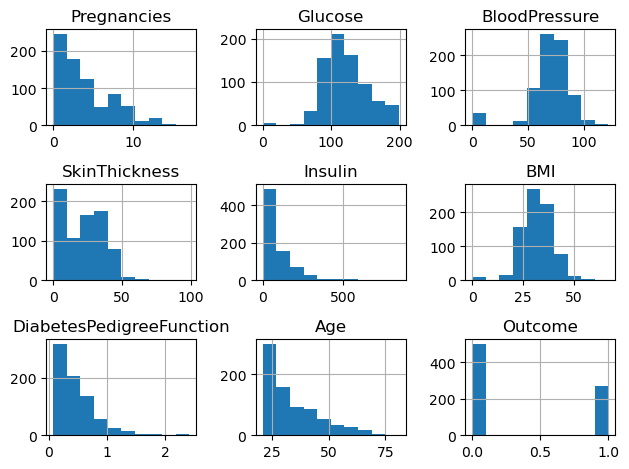

In [5]:
plt.figure(figsize=(12,10))
data.hist()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

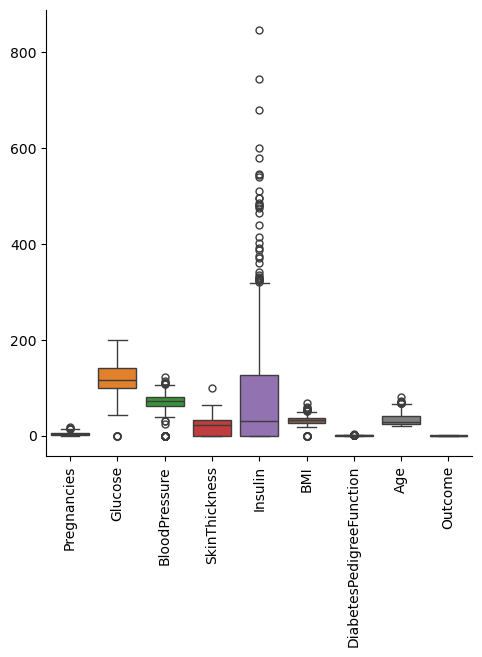

In [6]:
plt.figure(figsize=(12, 6))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()

##### Insulin is having the more outliers

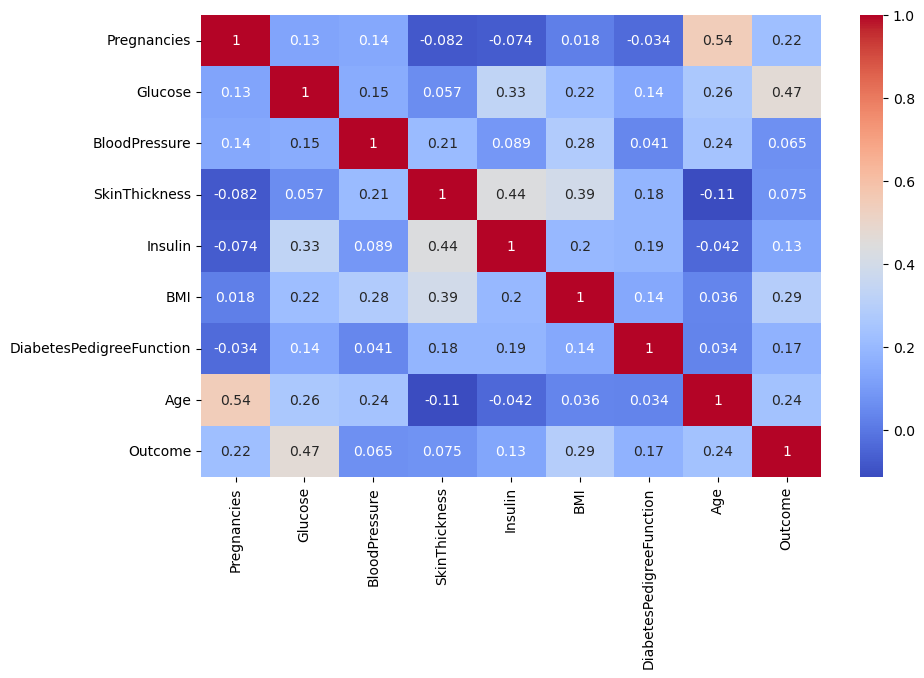

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


###### by the above corelation Glucose, BMI and Age are strong corelation with outcome. Pregnancies also but it's different case.

#### 2. Data Preprocessing:

In [8]:
# handling missing value 
# in some features we found the values as zero so replace them with nan
cols_having_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# replace with NaN
data[cols_having_zero] = data[cols_having_zero].replace(0, np.nan)
# fill missing values with median
data.fillna(data.median(), inplace=True)

In [9]:
# no categorical data so noo encoding required here

#### 3. Model Building: 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
#  train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [15]:
# scaling the data using Standardization
# scaling because larger-range features dominate the model. Here Glucose and Insulin
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Build the Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)

LogisticRegression()

#### 4. Model Evaluation: 

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

#### Test the model Training data

In [18]:
yhat_train = lg_model.predict(X_train_scaled)

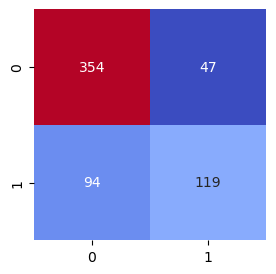

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [19]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_train, yhat_train)
sns.heatmap(cm, cmap='coolwarm', cbar=False, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, yhat_train))

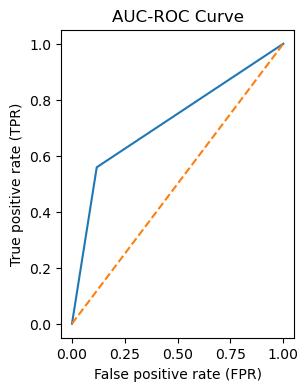

In [20]:
plt.figure(figsize=(3,4))
plt.title('AUC-ROC Curve')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

fpr, tpr, thresh = roc_curve(y_train, yhat_train)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='dashed')
plt.show()

In [21]:
yprob = lg_model.predict_proba(X_train_scaled)[:,1]

In [22]:
roc_auc_score(y_train, yprob)

0.8466978094669431

#### Test the model on testing data 

In [23]:
yhat_test = lg_model.predict(X_test_scaled)

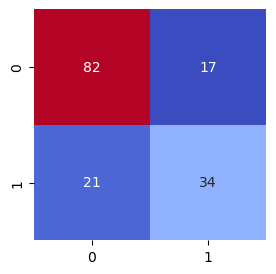

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [24]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, cmap='coolwarm', cbar=False, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, yhat_test))

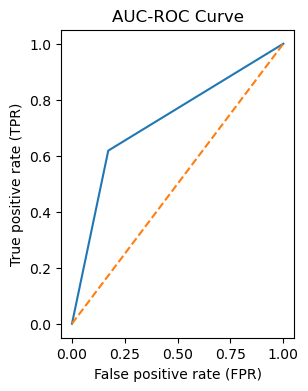

In [25]:
plt.figure(figsize=(3,4))
plt.title('AUC-ROC Curve')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

fpr, tpr, thresh = roc_curve(y_test, yhat_test)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='dashed')
plt.show()

In [26]:
yhat_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
yprob = lg_model.predict_proba(X_test_scaled)[:,1]

In [28]:
roc_auc_score(y_test, yprob)

0.82277318640955

#### 5. Interpretation: 

In [29]:
coeff_data = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lg_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
coeff_data

,Feature,Coefficient
1,Glucose,1.102682
5,BMI,0.688839
7,Age,0.392410
0,Pregnancies,0.222978
6,DiabetesPedigreeFunction,0.203635
3,SkinThickness,0.068836
4,Insulin,-0.138252
2,BloodPressure,-0.151540


##### Glucose has strong positive impact 
##### BMI and Age are the well contributors 
##### Insulin and BloodPressure are weaker influencers

#### 6. Deployment with Streamlit: 

In [30]:
import streamlit as st
import pickle
import os

In [40]:
st.set_page_config(
    page_title="Diabetes Prediction App",
    page_icon="🩺",
    layout="centered"
)

st.title("🩺 Diabetes Prediction using Logistic Regression")
st.write("Enter patient details to predict diabetes risk.")

BASE_PATH = r"C:\DataScienceNotes"
APP_FOLDER = os.path.join(BASE_PATH, "diabetes_app")
os.makedirs(APP_FOLDER, exist_ok=True)

with open(os.path.join(APP_FOLDER, "logistic_model.pkl"), "wb") as f:
    pickle.dump(lg_model, f)

with open(os.path.join(APP_FOLDER, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

In [41]:
st.write("Base directory:", APP_FOLDER)

In [42]:
# User Inputs
st.subheader("Patient Information")

pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose Level", min_value=0, max_value=200, value=120)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin Level", min_value=0, max_value=900, value=79)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=1, max_value=120, value=33)

In [43]:
if st.button("Predict Diabetes"):

    input_data = np.array([[ 
        pregnancies,
        glucose,
        blood_pressure,
        skin_thickness,
        insulin,
        bmi,
        dpf,
        age
    ]])

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    # Display result
    st.markdown("---")
    st.subheader("Prediction Result")

    if prediction == 1:
        st.error(f" Diabetic (Risk Probability: {probability:.2f})")
    else:
        st.success(f" Not Diabetic (Risk Probability: {probability:.2f})")

In [44]:
st.markdown("---")
st.caption("Model: Logistic Regression | Dataset: Pima Indians Diabetes Dataset")

DeltaGenerator()

In [45]:
st.write("Model loaded successfully")
st.write(lg_model)

In [46]:
print("Model loaded:", lg_model)
print("Scaler loaded:", scaler)


Model loaded: LogisticRegression()
Scaler loaded: StandardScaler()


#### Interview Questions:

Precision - Out of predicted positives, how many are actually positive 
            
            Important when false positives are costly

Recall - Out of actual positives, how many were correctly predicted 
         
         Important when missing a positive case is risky (medical diagnosis)

#### Cross-Validation

Splits data into multiple folds

Trains & validates model multiple times

Average performance is computed

#### importanance

Reduces overfitting

Gives reliable performance estimate

Ensures model generalizes well

#### Conclusion

Logistic Regression is effective for binary classification

Glucose, BMI, and Age are key predictors

Model evaluation metrics confirm good performance

Streamlit enables easy real-world deployment